In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/tapas/Downloads/Oil/Patent_Data_Variables.csv')

In [3]:
df.head()

,pat,fwd,lag_d,lag_y,noc,gy,ay,noi,UMC,firm,...,fpr,FT,Cent,EXP_Y,DT,IT,RT,3rd_PT,Rnd_Int,FS
0,6052760,35,895,3,6,2000,1997,3,711,596125,...,3,2,0.000022,3.33333,2.66666,9.74898,0.00000,0.0,0.05382,32.0
1,6052764,6,851,3,22,2000,1997,1,711,755619,...,0,2,0.000000,9.00000,0.00000,0.00000,0.00000,0.0,0.02247,18.0
2,6052773,66,1778,5,22,2000,1995,3,712,357270,...,0,2,0.000000,3.66666,0.00000,0.00000,0.00000,0.0,0.00000,NaN
3,6052775,14,1028,3,13,2000,1997,2,712,551495,...,0,2,0.000000,5.00000,3.50000,0.73076,0.00000,0.0,0.09262,17.0
4,6052776,7,915,3,9,2000,1997,3,712,252865,...,3,3,0.000000,5.33333,1.33333,2088.45722,0.33333,0.0,0.05907,330.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 25 columns):
pat        65535 non-null int64
fwd        65535 non-null int64
lag_d      65535 non-null int64
lag_y      65535 non-null int64
noc        65535 non-null int64
gy         65535 non-null int64
ay         65535 non-null int64
noi        65535 non-null int64
UMC        65535 non-null int64
firm       65535 non-null int64
MSA        65535 non-null int64
tbm        65535 non-null int64
tbru       65535 non-null float64
PAG        65535 non-null float64
npr        65535 non-null int64
fpr        65535 non-null int64
FT         65535 non-null int64
Cent       65535 non-null float64
EXP_Y      65535 non-null float64
DT         65535 non-null float64
IT         65535 non-null float64
RT         65535 non-null float64
3rd_PT     65535 non-null float64
Rnd_Int    65535 non-null float64
FS         38808 non-null float64
dtypes: float64(10), int64(15)
memory usage: 12.5 MB


In [5]:
#[print(df[val].value_counts()) for val in df.columns ]
df.columns

for var in df.columns:
    print(var, len(df[var].unique()))

pat 65535
fwd 351
lag_d 1927
lag_y 15
noc 192
gy 23
ay 19
noi 27
UMC 260
firm 8238
MSA 354
tbm 238
tbru 5396
PAG 63459
npr 163
fpr 68
FT 7
Cent 6564
EXP_Y 405
DT 476
IT 7849
RT 376
3rd_PT 68
Rnd_Int 2688
FS 274


In [6]:
categorical = ['FT','firm','UMC','MSA']
temporal = ['ay','gy']
numeric = [var for var in df.columns if var not in temporal and var not in categorical]

In [15]:
numeric

['pat',
 'fwd',
 'lag_d',
 'lag_y',
 'noc',
 'noi',
 'UMC',
 'firm',
 'MSA',
 'tbm',
 'tbru',
 'PAG',
 'npr',
 'fpr',
 'Cent',
 'EXP_Y',
 'DT',
 'IT',
 'RT',
 '3rd_PT',
 'Rnd_Int',
 'FS']

In [18]:
for var in numeric:
    print(var, df[var].unique()[0:20], '\n')

pat [6052760 6052764 6052773 6052775 6052776 6052777 6052778 6052780 6052781
 6052782 6052784 6052785 6052786 6052795 6052796 6052801 6052802 6052803
 6052819 6052670] 

fwd [35  6 66 14  7  5 39  3  9 83 12 10 18 41 23  4  2 17 20 52] 

lag_d [ 895  851 1778 1028  915 1191 1020 1152 1036  917  879  840 1267 1023
 1805  839  935 1103  963  991] 

lag_y [ 3  5  4  6  7  9  8 12 10  2 11  1  0 14 13] 

noc [ 6 22 13  9 14 35 24 19 25 12 26 17 47 10 64 46 34 36  7 18] 

noi [ 3  1  2  5  4  7  9  8  6 10 13 11 14 26 12 17 20 16 18 23] 

UMC [711 712 713 726 714 705 706 707 708 718 709 725 381 382 386 715 716 703
 717 340] 

firm [596125 755619 357270 551495 252865 280070 767124 767125 373440 278220
 211480 361691 641805 499570 728129 767117 512710 746763 706518 279275] 

MSA [156 261  32 553  16  31 240  52 168  13 202 538 243 268 537 198 251 213
 552 257] 

tbm [54  5 28  4  7 15 19 64 18 14 16  9  0 30 12  6 26 10  8 13] 

tbru [0.65505 0.32    0.63778 0.375   0.24491 0.34668 0.70915 0.

In [24]:
df[[var for var in numeric]].describe()

,pat,fwd,lag_d,lag_y,noc,noi,UMC,firm,MSA,tbm,...,npr,fpr,Cent,EXP_Y,DT,IT,RT,3rd_PT,Rnd_Int,FS
count,6.553500e+04,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,6.553500e+04,65535.000000,65535.000000,...,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,38808.000000
mean,5.516818e+06,26.730800,923.934127,2.546807,18.856489,2.444038,567.743236,4.364026e+05,275.958251,11.376257,...,2.957595,1.084245,0.000498,1.638537,0.916463,80.069878,0.255761,0.006082,0.086413,129.095522
std,4.662926e+05,33.322636,364.032954,1.071413,15.708926,1.792134,180.319111,3.336912e+06,188.192800,15.674491,...,10.918525,3.031729,0.006973,2.625059,2.324044,420.356247,1.311577,0.078734,6.469271,123.784974
min,4.184347e+06,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000e+00,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.237184e+06,8.000000,691.500000,2.000000,9.000000,1.000000,375.000000,2.500600e+05,142.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000
50%,5.625570e+06,16.000000,888.000000,2.000000,16.000000,2.000000,704.000000,3.867350e+05,260.000000,8.000000,...,1.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.050170,94.000000
75%,5.881240e+06,33.000000,1100.000000,3.000000,24.000000,3.000000,711.000000,6.726890e+05,526.000000,13.000000,...,2.000000,1.000000,0.000000,2.500000,0.666660,0.000000,0.000000,0.000000,0.073030,225.000000
max,6.836878e+06,841.000000,5285.000000,14.000000,375.000000,32.000000,800.000000,8.520611e+08,610.000000,745.000000,...,692.000000,91.000000,0.338530,24.000000,46.000000,3161.845890,87.444440,8.250000,1639.000000,854.000000


In [7]:
print('There are {} numeric variables'.format(len(numeric)))

There are 19 numeric variables


In [28]:
for var in numeric:
    if df[var].isnull().sum() > 0:
        print (var,df[var].isnull().sum())


FS 26727


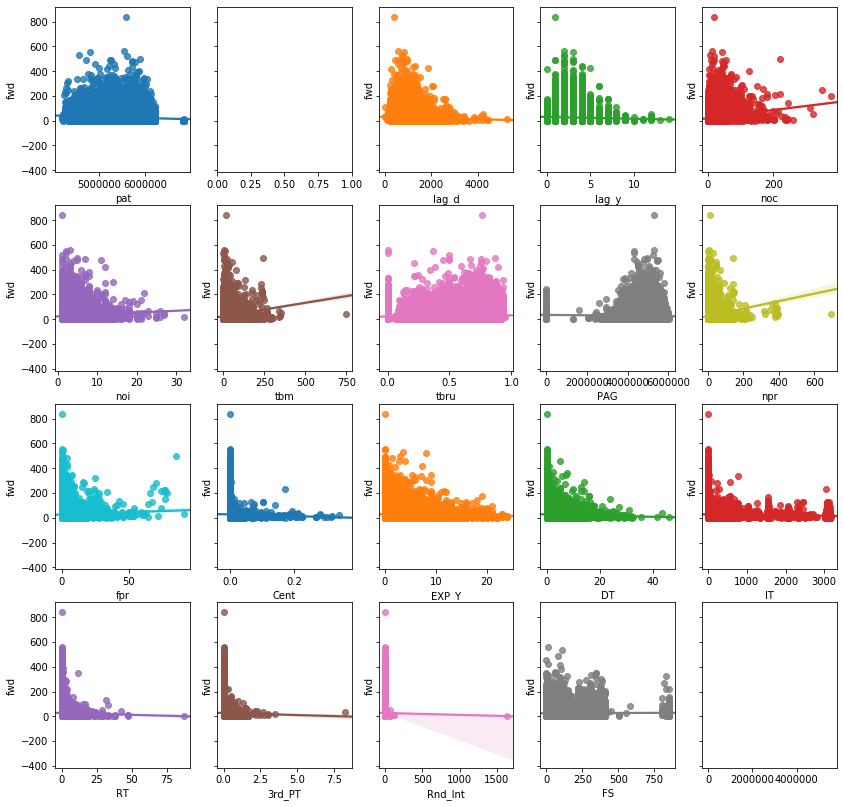

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

fig, axs = plt.subplots(ncols=5, nrows=4,sharey=True,figsize=(14,14))
axs = axs.flatten()
for i,var in enumerate(numeric):
    if var != 'fwd':
        sns.regplot(x=var,y='fwd',data=df, ax = axs[i])

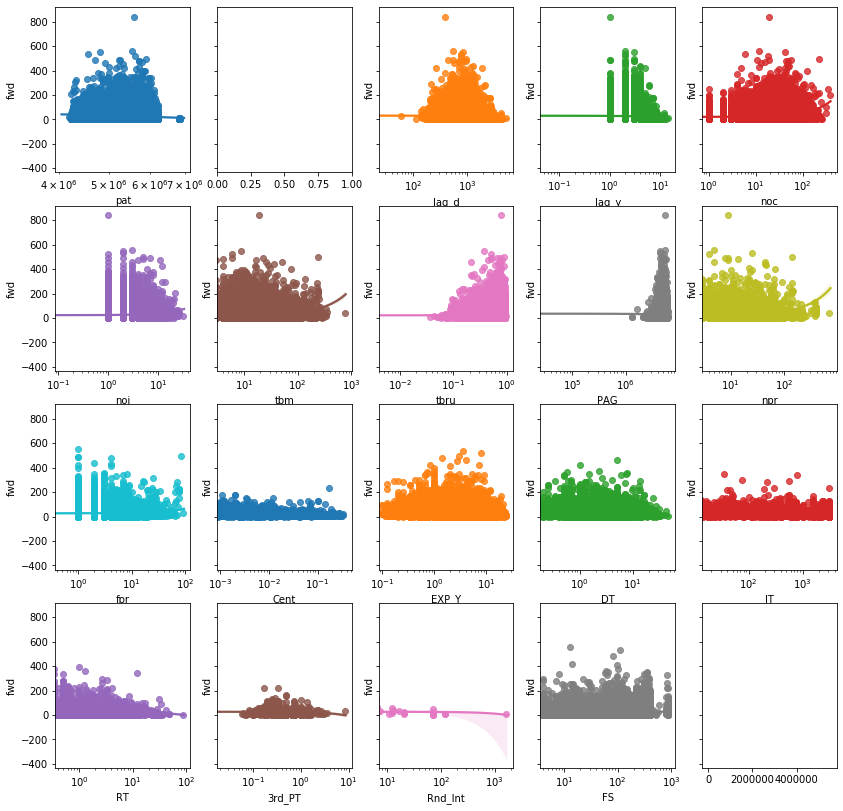

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

fig, axs = plt.subplots(ncols=5, nrows=4,sharey=True,figsize=(14,14))
axs = axs.flatten()
for i,var in enumerate(numeric):
    if var != 'fwd':
        splot = sns.regplot(x=var,y='fwd',data=df, ax = axs[i])
        splot.set(xscale="log")

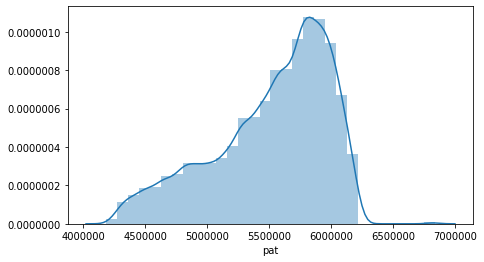

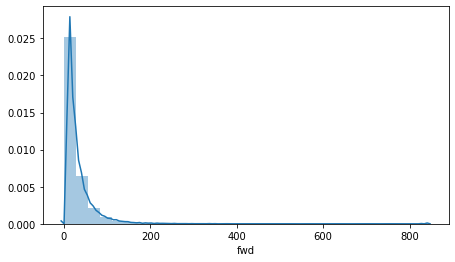

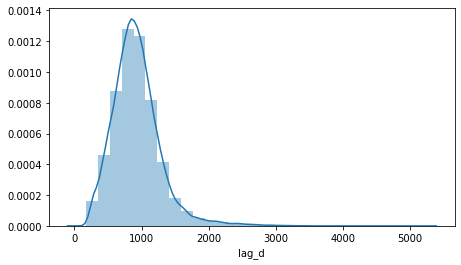

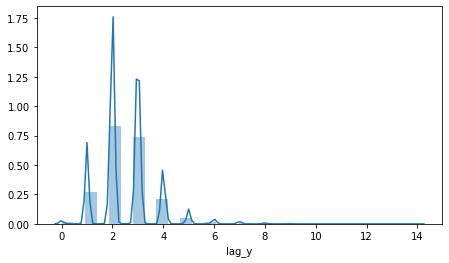

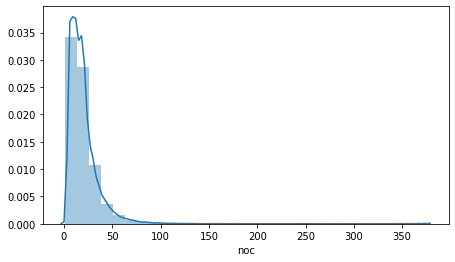

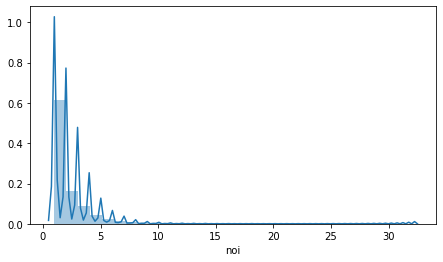

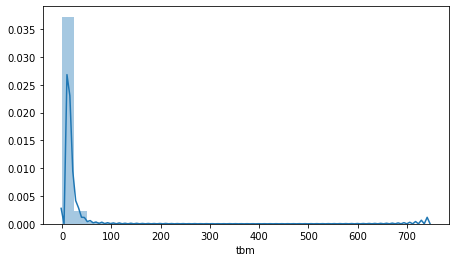

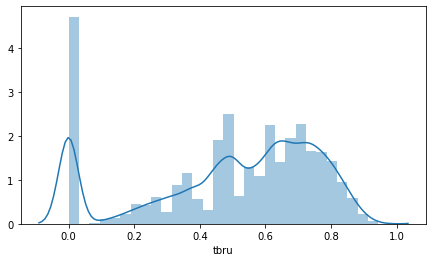

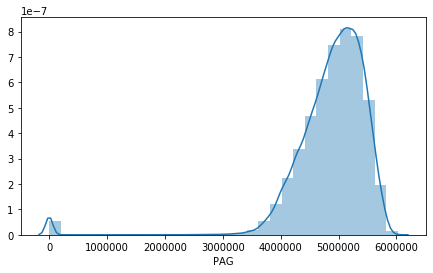

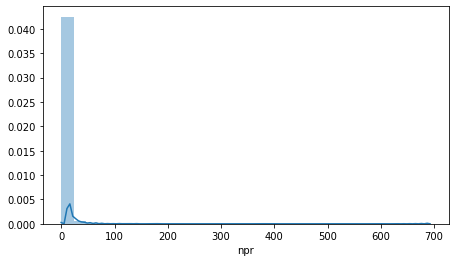

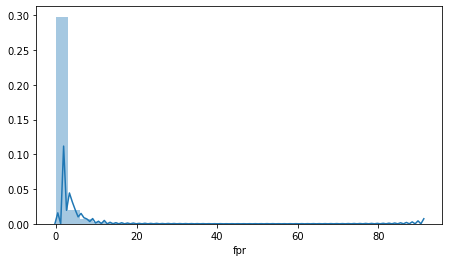

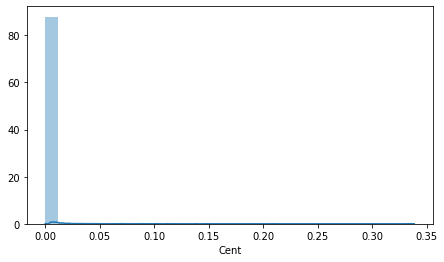

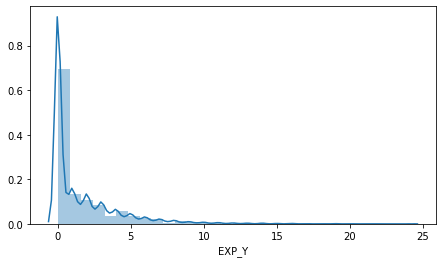

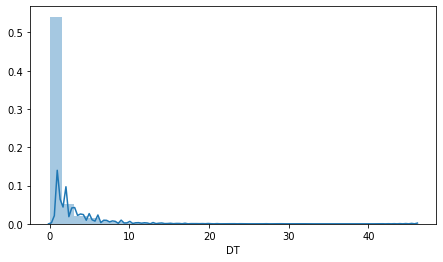

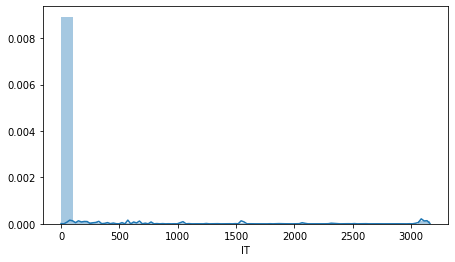

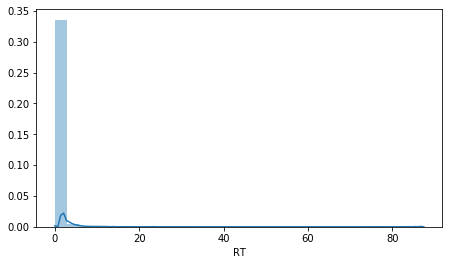

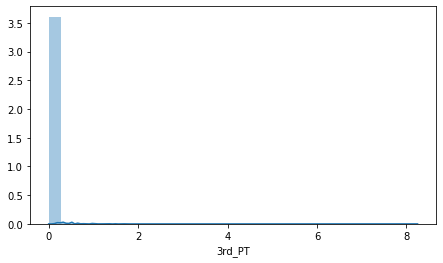

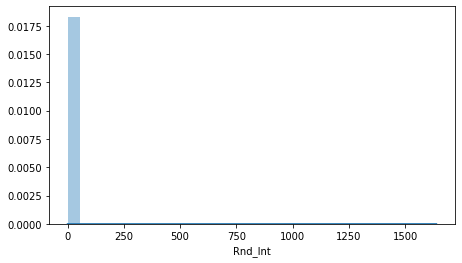

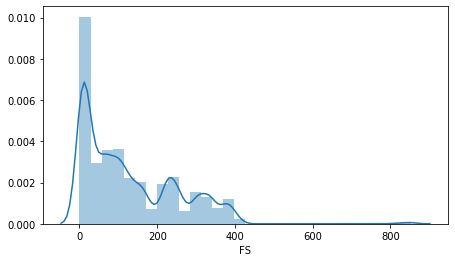

In [99]:
#fig,axs = plt.subplots(nrows=5,ncols=4,sharey=True,figsize=(14,14))
#axs = axs.flatten()
for i,var in enumerate(numeric):
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 2, 1)
    sns.distplot(df[var], bins=30)
    
    

In [ ]:
'''
pat - left skewd 
lad_d - almost normal
lag_y - extremeley non-normal (6+ peaks) / treat as discrete
noc - right skewed
noi - extremeley non-normal (6+ peaks)/ treat as discrete
tbm - right skewed
tbru - extremely non-normal (3 peaks has negative values)
PAG - Mostly normal(except for low outliers)
npr - right skewed
fpr - non-normal
cent- 
EXP_Y - right skewed 
DT - right skewed (multiple peaks)
IT- non-normal
RT - right skewed
3rd_PT - not clear
Rnd_int 
FS - non normal - multiple peaks

'''



In [80]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()
    

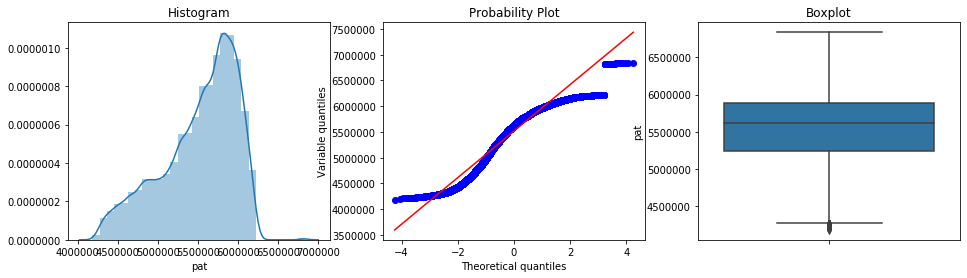

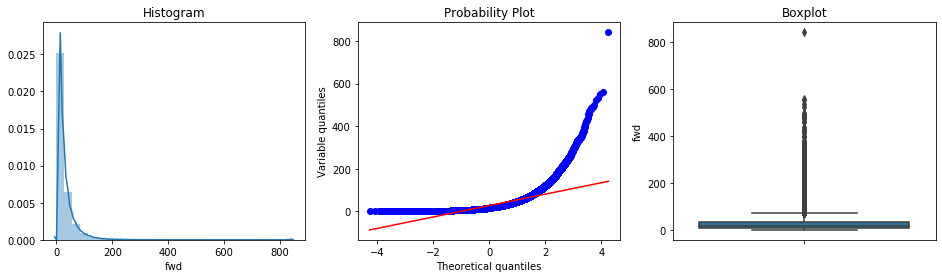

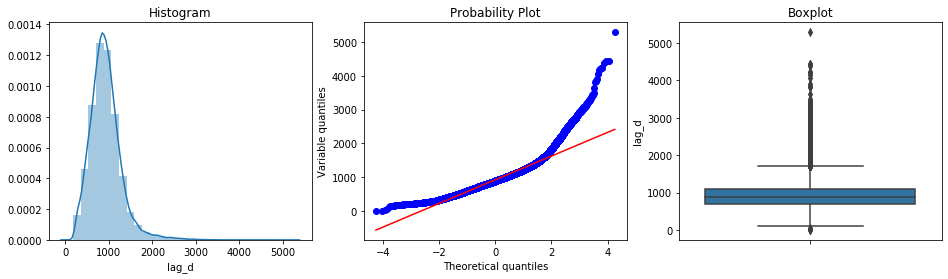

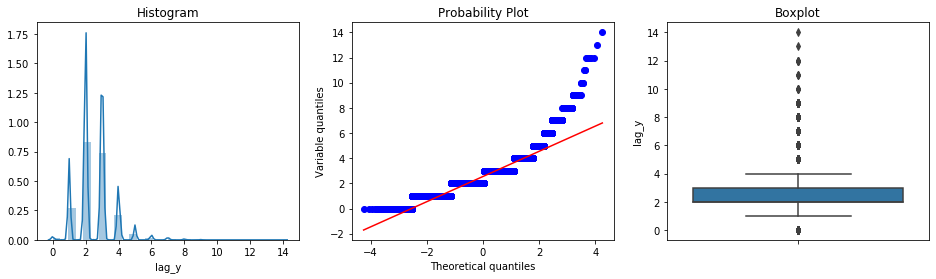

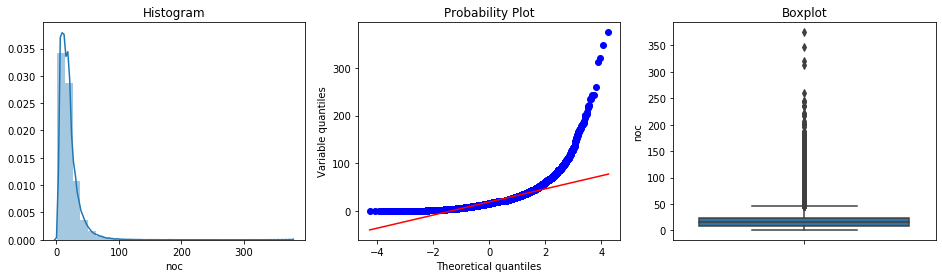

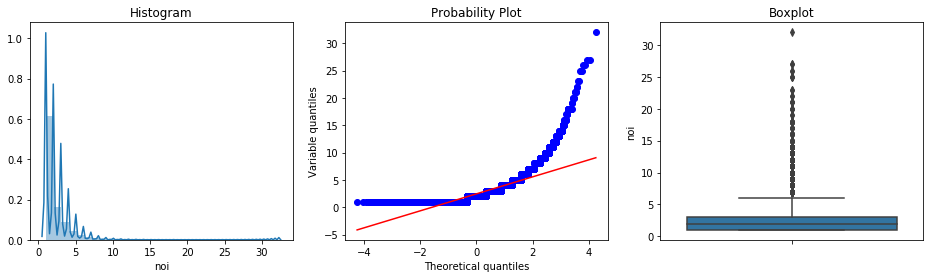

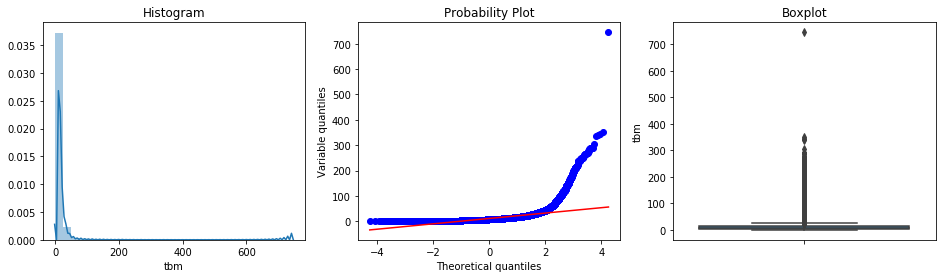

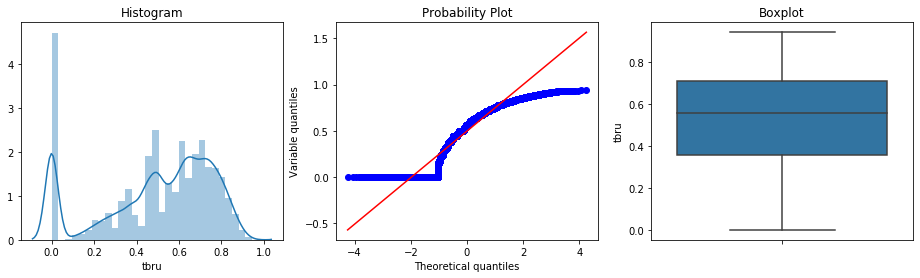

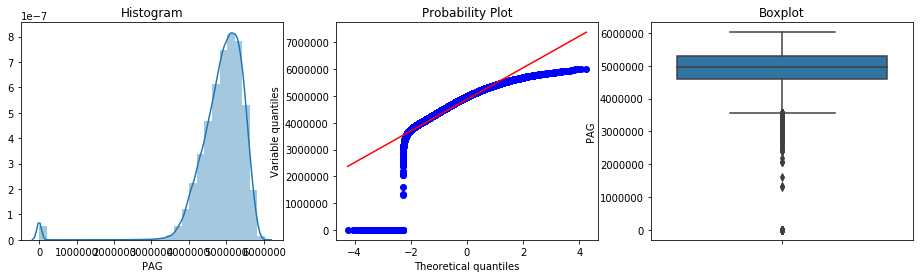

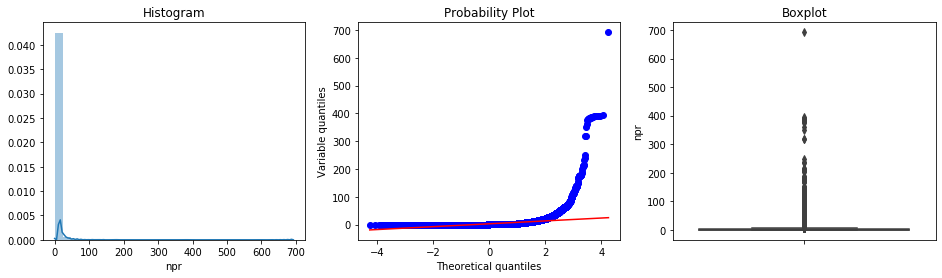

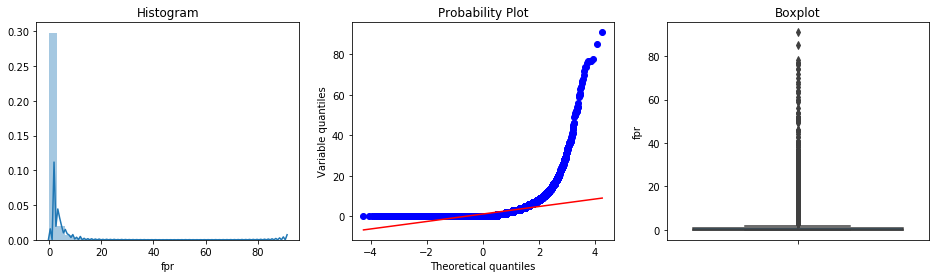

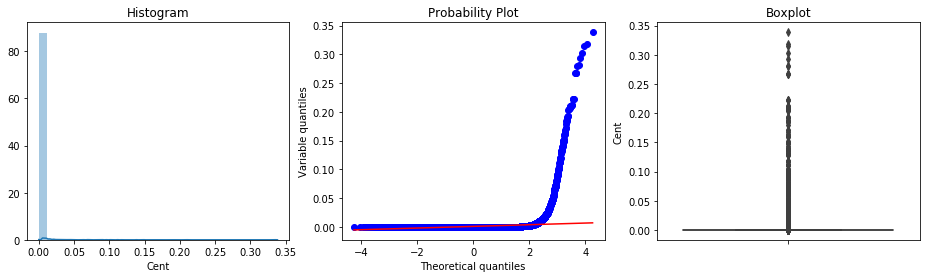

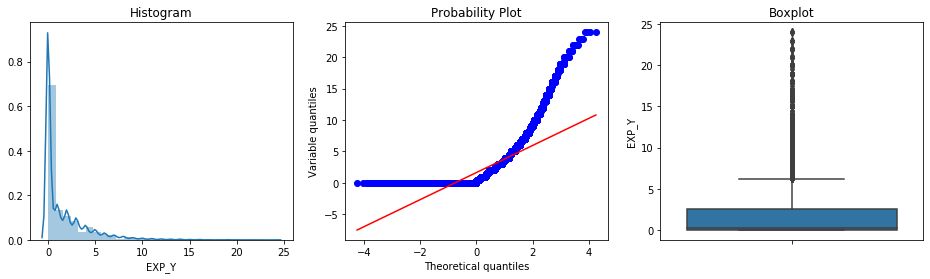

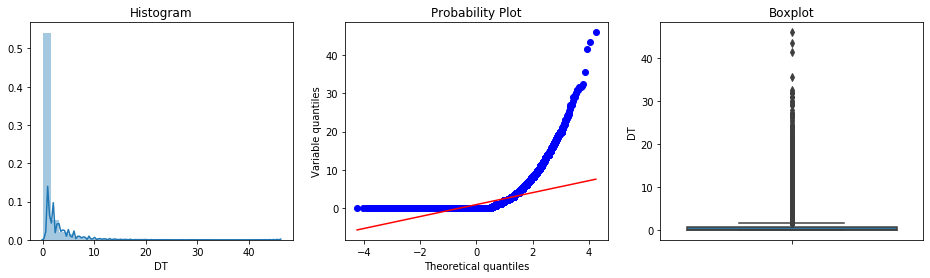

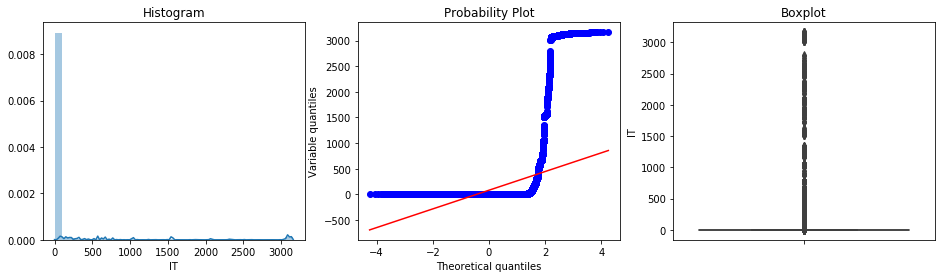

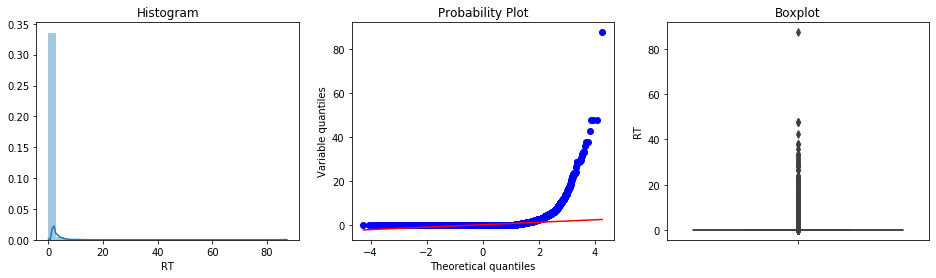

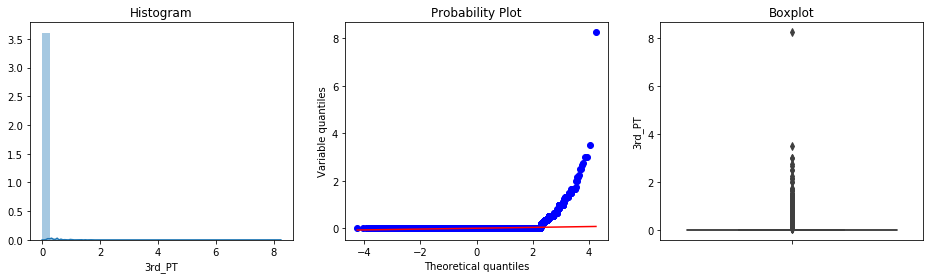

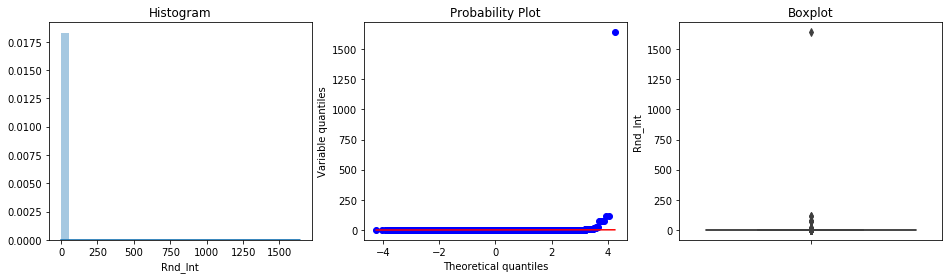

/opt/anaconda3/envs/buan6341/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/envs/buan6341/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/anaconda3/envs/buan6341/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/anaconda3/envs/buan6341/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


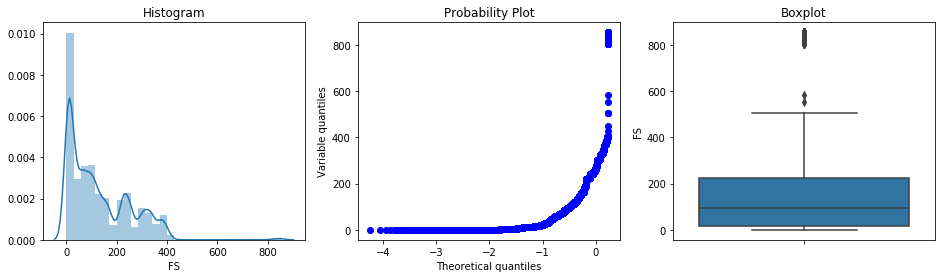

In [81]:
for variable in numeric:
    diagnostic_plots(df, variable)

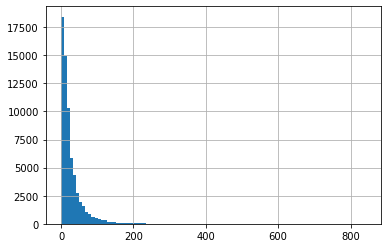

In [93]:
discrete = ['lag_y','noi','EXP_Y','DT','IT','FS']

#lag_y and noi rare label encoding
#fpr/npr capping /discretization 

# EXP_Y check for outliers
#discrete = ['DT']
#DT/IT too many high values
#remove outliers from PAG
#npr remove outliers
#fpr remove outliers

df['fwd'].hist(bins=100)

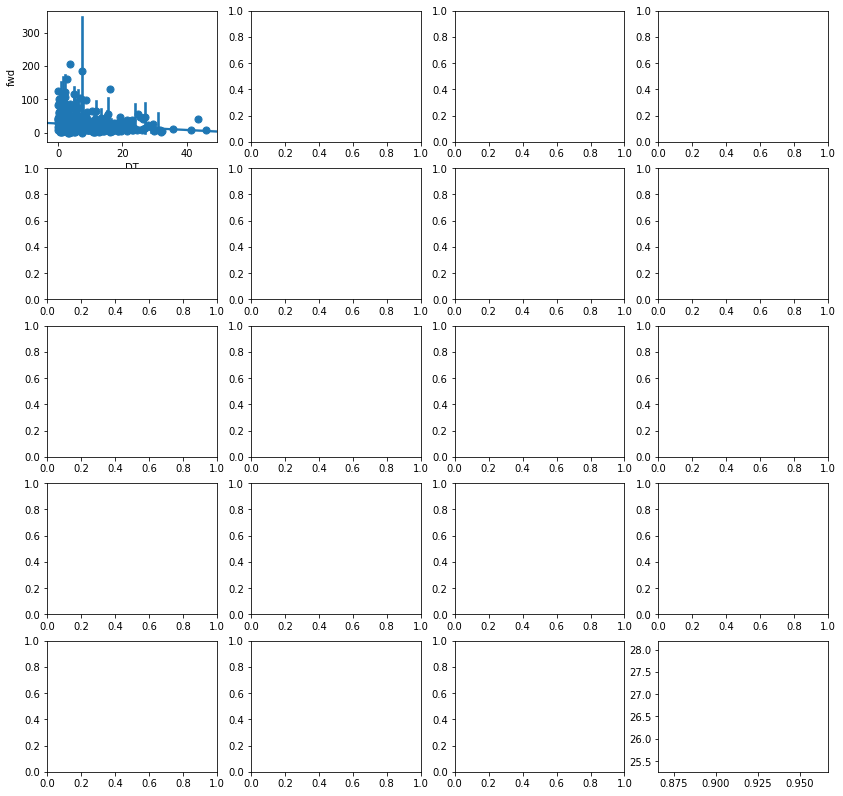

In [92]:
# let's plot the median sale price per value of the discrete
# variable
fig, axs = plt.subplots(ncols=4, nrows=5,figsize=(14,14))
axs = axs.flatten()

for i, var in enumerate(discrete):
    if var != "fwd":
        sns.regplot(x=var, y="fwd", data=df, ax=axs[i],x_estimator=np.median);

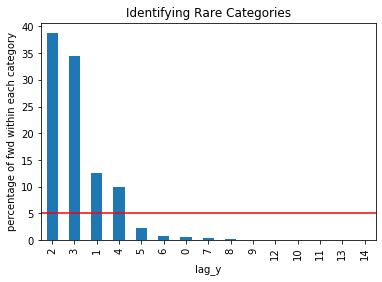

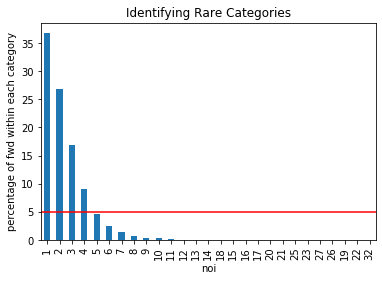

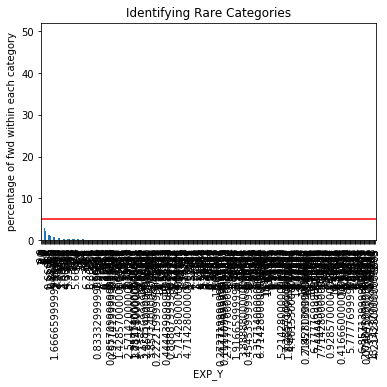

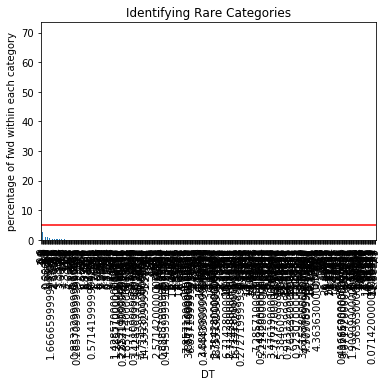

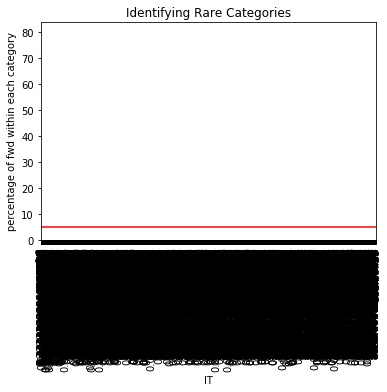

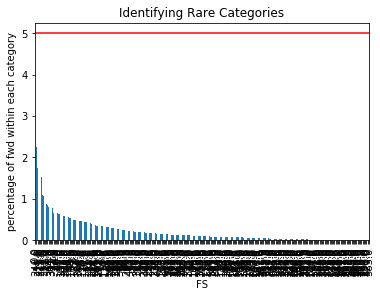

In [95]:
for var in discrete:
    freq_var = 100*(df[var].value_counts() / len(df))
    # let's make plot with the category frequencies
    fig = freq_var.sort_values(ascending=False).plot.bar()

    # add a line to signal 5 % frequency limit
    # under which we will consider a category as rare
    fig.axhline(y=5, color='red')

    # add axis labels and title
    fig.set_ylabel('percentage of fwd within each category')
    fig.set_xlabel(var)
    fig.set_title('Identifying Rare Categories')
    plt.show()

In [ ]:
#In a scatter plot between predictor and Y, if the mean/median of the predictor has a linear relationship with the Y,
#Does it mean they have a linear relationship

#When to do inverse transformation on a predictor

#Transformations are done to make sure, assumptions of linear regression are met

# Does transformation also help make the prediction better? how?

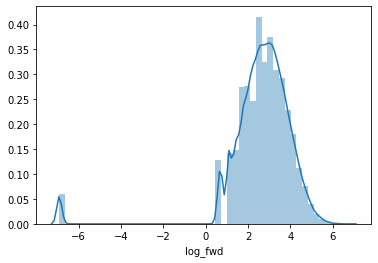

In [31]:
sns.distplot(df['log_fwd'],bins=50)

((array([-4.25235536, -4.04941272, -3.93887608, ...,  3.93887608,
          4.04941272,  4.25235536]),
  array([  0,   0,   0, ..., 551, 559, 841])),
 (26.869525591687804, 26.730800335698476, 0.8062985549511898))

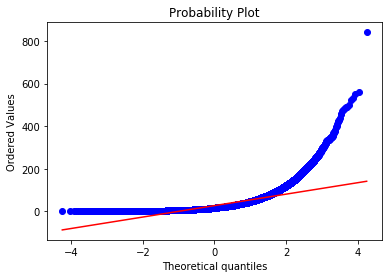

In [19]:
stats.probplot(df['fwd'],dist='norm',plot=plt)

In [27]:
df['log_fwd'] = df['fwd'].apply(lambda x: np.log(x+0.001))

((array([-4.25235536, -4.04941272, -3.93887608, ...,  3.93887608,
          4.04941272,  4.25235536]),
  array([-6.90775528, -6.90775528, -6.90775528, ...,  6.31173662,
          6.32615126,  6.73459285])),
 (1.3557635226258584, 2.6302380520091035, 0.847170104976555))

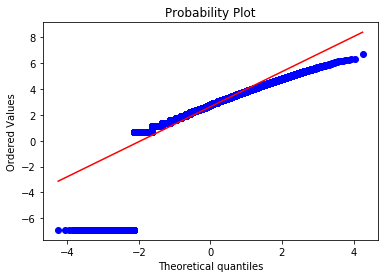

In [28]:
stats.probplot(df['log_fwd'],dist='norm',plot=plt)

In [37]:
#sns.distplot(df['log_fwd'],bins=50)
df[df['log_fwd'] <0]['log_fwd'].value_counts()

-6.907755    1089
Name: log_fwd, dtype: int64

In [34]:
df[df['fwd'] < 8]['fwd'].value_counts()

4    2644
7    2555
3    2530
5    2489
6    2441
2    2297
0    1089
Name: fwd, dtype: int64

In [35]:
df['fwd'].value_counts()

4      2644
7      2555
3      2530
5      2489
6      2441
       ... 
238       1
366       1
239       1
351       1
271       1
Name: fwd, Length: 351, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split

data = df.drop(['ay','gy','log_fwd'],axis=1)

X_train,X_test,y_train,y_test = train_test_split(data.drop(['fwd'],axis=1),data['fwd'],test_size=0.2,random_state=0)
X_train.shape, X_test.shape

((52428, 22), (13107, 22))

In [71]:
X_train.head()

,pat,lag_d,lag_y,noc,noi,UMC,firm,MSA,tbm,tbru,...,fpr,FT,Cent,EXP_Y,DT,IT,RT,3rd_PT,Rnd_Int,FS
47561,5083119,1128,4,36,2,345,157510,538,10,0.18000,...,0,3,0.000000e+00,0.00000,0.0,0.00000,0.0,0.0,0.00000,NaN
1095,6032151,834,3,21,5,707,551495,32,2,0.50000,...,0,2,2.400000e-08,2.00000,1.8,0.10000,0.8,0.0,0.09262,17.0
40928,5319151,806,2,67,5,84,91775,553,18,0.10495,...,17,3,0.000000e+00,1.00000,5.0,0.66666,2.0,0.0,0.00000,NaN
38376,5390322,1474,4,14,3,714,0,252,7,0.81637,...,0,1,0.000000e+00,0.66666,0.0,0.00000,0.0,0.0,0.00000,NaN
4925,5970462,718,2,16,1,705,0,60,5,0.56000,...,0,1,0.000000e+00,0.00000,0.0,0.00000,0.0,0.0,0.00000,NaN


In [58]:
X_train[categorical] = X_train[categorical].astype('O')
X_train[categorical] = X_test[categorical].astype('O')

In [59]:
# import relevant modules for feature engineering
from sklearn.pipeline import Pipeline
from feature_engine import missing_data_imputers as mdi
from feature_engine import categorical_encoders as ce

In [60]:
prep_pipeline = Pipeline([
    ('imputer_num', mdi.MeanMedianImputer(imputation_method='median',variables=['FS'])),
    ('rare_label_inc',ce.RareLabelCategoricalEncoder(tol=0.01,n_categories=6, variables=categorical)),
    ('categorical_enc', ce.OneHotCategoricalEncoder(variables = categorical)),
])

In [62]:
prep_pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('imputer_num',
                 MeanMedianImputer(imputation_method='median',
                                   variables=['FS'])),
                ('rare_label_inc',
                 RareLabelCategoricalEncoder(n_categories=6, tol=0.01,
                                             variables=['FT', 'firm', 'UMC',
                                                        'MSA'])),
                ('categorical_enc',
                 OneHotCategoricalEncoder(drop_last=False, top_categories=None,
                                          variables=['FT', 'firm', 'UMC',
                                                     'MSA']))],
         verbose=False)

In [63]:
# Apply Transformations
X_train=prep_pipeline.transform(X_train)
X_test=prep_pipeline.transform(X_test)

In [64]:
from sklearn.linear_model import LinearRegression

lr= LinearRegression()
lr.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_train, y_train)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.05847998 0.05715445 0.05980758 0.04245857 0.05834336]
Average cross-validation score: 0.06


In [66]:
lr.score(X_train,y_train)

0.05702349845489829

In [67]:
lr.score(X_test,y_test)

0.05127101537271883

In [ ]:
'''
Variables :
pat : Patent Number
fwd: Number of forward citation received by patent
lag_d: Difference between grant date and application date in years. 
noc: Number of claims in the patent. The claims in a patent document delineate the legal scope of the patent in precise language.
gy: year in which patent was granted
ay: year in which patent was applied at USPTO(United State Patent Office)
noi: number of inventors
umc: 3-digit technology primary classes of patents.
firm id : firm to whom the patent is assigned
MSA: Regional ID : MSA (Metropolitan statistical area) ID for the region of first inventor of patent. Country ID for Non US countries.
tbm: total backward citations made by the patent. Total number of patents cited by this patent
tbru: technical breadth of patent: defined for the focal patent i as 1-∑_j▒s_(ij ,)^2  where s_ij refers to the fraction of patents cited by patent i that belong to technology class j. A higher value indicate that patent is broad.
pag: Prior art age : Patents are numbered sequentially, with newer patents being assigned higher patent numbers. Based on this information, we measure the age of the prior art for the focal patent as the average patent number of the patents that it cites (Fleming et al. 2007a). A higher value for this variable indicates that the inventors have built the patent on relatively newer technology.
npr: Non Patent References: the number of non-patent references cited by the focal patent
fpr: Foreign Patent References : number of foreign patent references cited by focal patent.
ft:  Firm_Type: Based On NBER Data types - 7 types of Assigneee: 1 - unassigned; 2 - US non government organization; 3- non US non government organization; 4- US individuals; 5-non US individuals; 6- US government; 7- non US government
cent: Centrality: Teams that occupy more central positions in a network can potentially control both the information flow and the resources of the network. We compute an inventor’s centrality using Freeman's (1979) measure of betweenness centrality. A team’s centrality is then calculated by calculating the average betweenness centrality across all of the team members (Wasserman and Faust 1994). This measure indicates a team’s ability to absorb (or participate in) information flows and hence, its ability to create valuable innovations
dt : Direct ties : For each patent, we identify the unique inventors who have collaborated with any of the inventors on the focal team during the previous three years but are not current team members. If an inventor has collaborated with more than one team member in the past, the inventor is only counted once. To illustrate, consider a team of two inventors, A and B. Assume that inventor A has ties with C and D at distance 1 and with E and F at distance 2, while inventor B has ties with C and F at distance 1 and with G at distance 2. For this team, the number of unique direct contacts (C, D and F) is 3. We then divide this number by the number of team members to normalize the number of direct contacts for the team (Uzzi and Spiro 2005) .
it : Number of indirect ties : For each team, we first identify the number of unique inventors that are connected to the inventors in the focal team at a path distance of two or greater, thus excluding the direct ties. The likelihood of information transmission between inventors of the focal team and the external collaborators decreases as the shortest path connecting these increases. To account for this we then utilize the frequency decay measure provided by Burt (1992) in our calculation of indirect ties. The frequency decay function for any external tie at a distance j is given as d_j=1-f_j/(∑_j▒〖f_j+1〗), where f_j  is the number of unique external collaborators of the focal team with a path distance less than or equal to j. 
rt: We count the number of unique patents on which a pair of inventors of the focal team have worked in the last three years as a measure of repeat ties. 
3rd_Pt: We count the number of unique common inventors with whom a pair of inventors of the focal team (who are collaborating for the first time) have previously worked in the last three years as a measure of third party ties
rnd_int: R&D intensity : RD investment /sales - based on data for one year before patent application.
fs: Firm Size : Total no of employess from Compustat - based on data for one year before patent application.


'''

In [100]:

def find_boundaries(df, variable, distance):

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)


    return upper_boundary, lower_boundary

In [101]:
# let us find boundaries for LotFrontage
for var in numeric:
    upper_boundary, lower_boundary = find_boundaries(data, var,1.5)
    upper_boundary, lower_boundary
    outliers = np.where(data[var] > upper_boundary, True,
        np.where(data[var] < lower_boundary, True, False))
    print(var,outliers.sum()/len(data))

pat 0.0020294499122606243
fwd 0.075898374914168
lag_d 0.02970931563286793
lag_y 0.044037537193865876
noc 0.04925612268253605
noi 0.03364614328221561
tbm 0.06903181506065462
tbru 0.0
PAG 0.01585412375066758
npr 0.12961013199053942
fpr 0.13806363012130923
Cent 0.16926832990005342
EXP_Y 0.06001373311970703
DT 0.16800183108262762
IT 0.20224307621881438
RT 0.1488517586022736
3rd_PT 0.011520561532005799
Rnd_Int 0.020645456626230258
FS 0.0020447089341573206


In [102]:
df['Cent'].describe()

count    65535.000000
mean         0.000498
std          0.006973
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.338530
Name: Cent, dtype: float64

In [103]:
df['Cent'].value_counts()

0.000000e+00    54442
6.050000e-08       55
1.215000e-07       43
1.535000e-07       39
9.600000e-08       39
                ...  
1.052000e-05        1
1.679522e-03        1
1.734770e-03        1
4.402960e-05        1
3.205089e-03        1
Name: Cent, Length: 6564, dtype: int64

In [104]:
df['fpr'].describe()

count    65535.000000
mean         1.084245
std          3.031729
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         91.000000
Name: fpr, dtype: float64